In [91]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

# satss models
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf
from statsmodels.tools.eval_measures import rmse

#Time aeries analysis -PDMARIMA
import pmdarima
from pmdarima.arima import auto_arima

#Time series analysis -FBPROPHET
import fbprophet
from fbprophet import Prophet

Reading the cleaed data

In [92]:
paris = pd.read_csv(r'C:\Users\radek\Git-Hub\Final_Project_Ironhack\05 - Time Series\Paris_clean_for_ts.csv')

In [93]:
paris.head()

,datetime,pm25,pm10,o3,no2
0,2014-01-01,43.0,30.0,22.0,42.0
1,2014-01-02,53.0,33.0,22.0,34.0
2,2014-01-03,50.0,28.0,23.0,41.0
3,2014-01-04,52.0,23.0,19.0,34.0
4,2014-01-05,45.0,20.0,20.0,30.0


In [94]:
paris.datetime= pd.to_datetime(paris.datetime)

In [95]:
paris.dtypes

datetime    datetime64[ns]
pm25               float64
pm10               float64
o3                 float64
no2                float64
dtype: object

<AxesSubplot:xlabel='datetime', ylabel='pm25'>

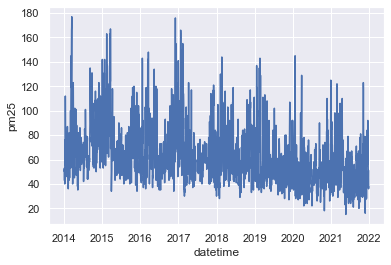

In [96]:
sns.lineplot(x='datetime', y='pm25', data=paris)

<AxesSubplot:xlabel='datetime', ylabel='pm10'>

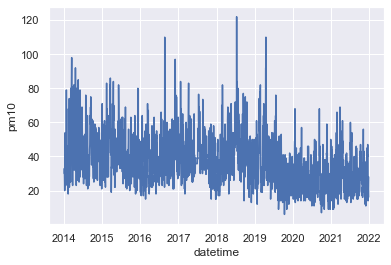

In [97]:
sns.lineplot(x='datetime', y='pm10', data=paris)

<AxesSubplot:xlabel='datetime', ylabel='o3'>

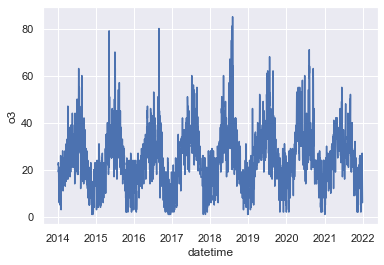

In [98]:
sns.lineplot(x='datetime', y='o3', data=paris)

<AxesSubplot:xlabel='datetime', ylabel='no2'>

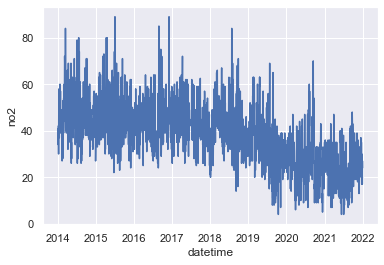

In [99]:
sns.lineplot(x='datetime', y='no2', data=paris)

## Time series analysis of PM 2.5

In [100]:
data_pm25=paris.pm25.tolist()
date_time = paris.datetime.tolist()
pm25= pd.DataFrame({'ds':date_time, 'y':data_pm25})
pm25.dtypes

ds    datetime64[ns]
y            float64
dtype: object

#### Stationarity 

In [101]:
result = adfuller(pm25.y)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -6.23
5% Critical Value: -2.86
p-value: 0.00


In [102]:
output_df = pd.DataFrame({"Values":[result[0],result[1],result[2],result[3], result[4]['1%'], result[4]['5%'], result[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

         Values                       Metric
0 -6.231608e+00              Test Statistics
1  4.937869e-08                      p-value
2  2.200000e+01             No. of lags used
3  2.899000e+03  Number of observations used
4 -3.432608e+00          critical value (1%)
5 -2.862538e+00          critical value (5%)
6 -2.567301e+00         critical value (10%)


Basing on the Dickey - Fuller test I can conclude that the data is stationary as the p-value is below 0.05 

#### Autocorrelation

In [103]:
autocorrelation_lag1 = paris['pm25'].autocorr(lag=1)
print("One Day Lag: ", autocorrelation_lag1)
autocorrelation_lag3 = paris['pm25'].autocorr(lag=3)
print("Three Day Lag: ", autocorrelation_lag3)

autocorrelation_lag6 = paris['pm25'].autocorr(lag=6)
print("Six Day Lag: ", autocorrelation_lag6)

autocorrelation_lag9 = paris['pm25'].autocorr(lag=9)
print("Nine Day Lag: ", autocorrelation_lag9)

One Day Lag:  0.7494992027538105
Three Day Lag:  0.44102496689975346
Six Day Lag:  0.291831481482925
Nine Day Lag:  0.1966319111013463


C:\Users\radek\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


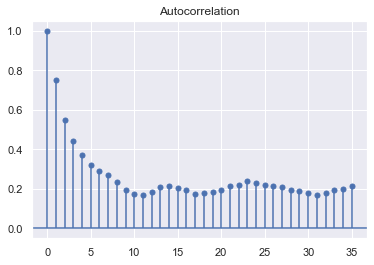

In [104]:
pmdarima.plot_acf(pm25.y)

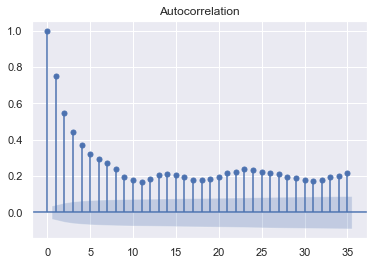

In [105]:
plot_acf(pm25.y)
plt.show()

#### Partial autocorrelation

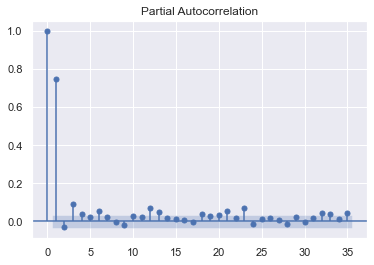

In [106]:
plot_pacf(pm25.y)
plt.show()

#### Decomposition to see the trend line

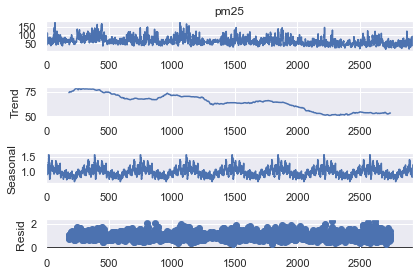

In [107]:
decompose = seasonal_decompose(paris.pm25,model='multiplicative', period=365)
decompose.plot()
plt.show()

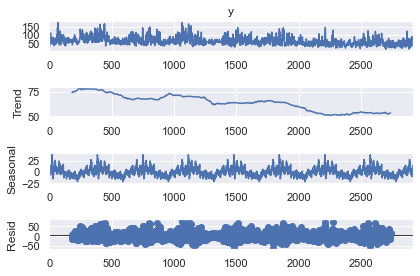

In [108]:
decompose_pm_add = seasonal_decompose(pm25.y,model='additive', period=365)
decompose_pm_add.plot()
plt.show()

#### Train test split

In [109]:
(pm25.shape[0])*0.8

2337.6

In [110]:
train = pm25[:2338]
test = pm25[2338:]

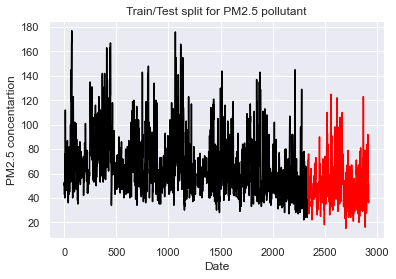

In [111]:
plt.plot(train.y, color = "black")
plt.plot(test.y, color = "red")
plt.title("Train/Test split for PM2.5 pollutant")
plt.ylabel("PM2.5 concentartion")
plt.xlabel('Date')
sns.set()
plt.show()

### Prophet 

In [112]:
# define the model
model_pm25_1 = Prophet(daily_seasonality=True)
# fit the model
model_pm25_1.fit(train)

          ds       yhat  yhat_lower  yhat_upper
0 2020-05-27  47.900044   19.809878   73.997070
1 2020-05-28  48.367984   20.325994   74.215218
2 2020-05-29  50.452240   23.497498   75.796694
3 2020-05-30  48.403293   25.199522   75.109967
4 2020-05-31  44.992956   17.812074   71.107954


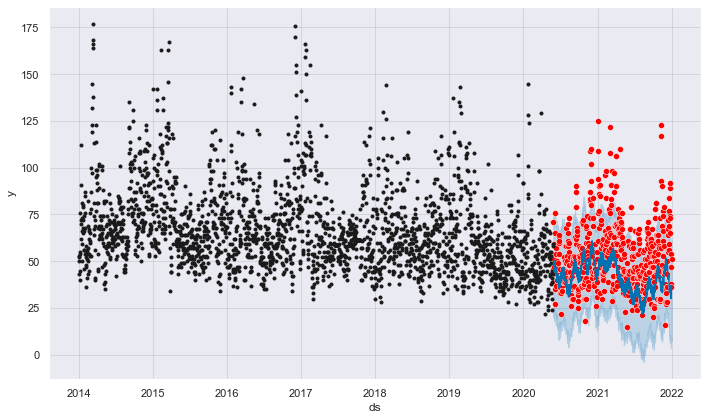

In [113]:
forecast_pm25_1 = model_pm25_1.predict(test)
# summarize the forecast
print(forecast_pm25_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model_pm25_1.plot(forecast_pm25_1)
sns.scatterplot(x='ds', y='y',data=test, color = "red")
plt.show()

In [114]:
future_1 = model_pm25_1.make_future_dataframe(periods=400, freq='D')
forecast1 = model_pm25_1.predict(future_1)
forecast1.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2733,2021-06-26,16.028767,4.085613,55.088647,15.030392,16.970564,14.425866,14.425866,14.425866,23.708985,...,1.109849,1.109849,1.109849,-10.392967,-10.392967,-10.392967,0.0,0.0,0.0,30.454633
2734,2021-06-27,16.003639,1.536140,54.205878,15.001264,16.945173,11.100993,11.100993,11.100993,23.708985,...,-2.357994,-2.357994,-2.357994,-10.249998,-10.249998,-10.249998,0.0,0.0,0.0,27.104633
2735,2021-06-28,15.978512,0.014415,52.251957,14.972137,16.918879,10.783847,10.783847,10.783847,23.708985,...,-2.883825,-2.883825,-2.883825,-10.041314,-10.041314,-10.041314,0.0,0.0,0.0,26.762359
2736,2021-06-29,15.953384,0.929062,54.090681,14.943009,16.892586,12.337406,12.337406,12.337406,23.708985,...,-1.598826,-1.598826,-1.598826,-9.772753,-9.772753,-9.772753,0.0,0.0,0.0,28.290791
2737,2021-06-30,15.928257,6.495631,56.848222,14.913881,16.866368,15.357937,15.357937,15.357937,23.708985,...,1.100373,1.100373,1.100373,-9.451422,-9.451422,-9.451422,0.0,0.0,0.0,31.286194


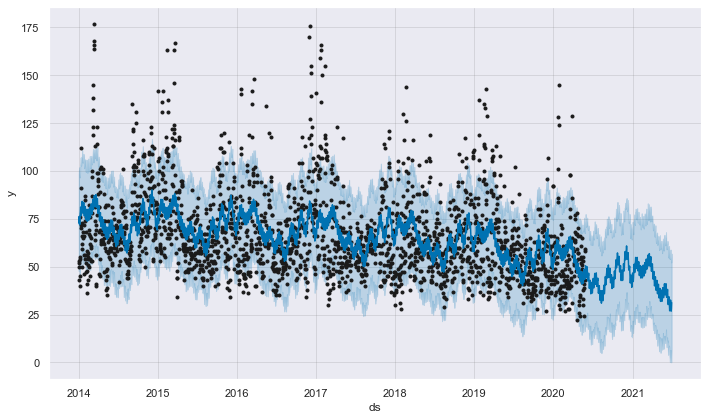

In [115]:
model_pm25_1.plot(forecast1)
plt.show()

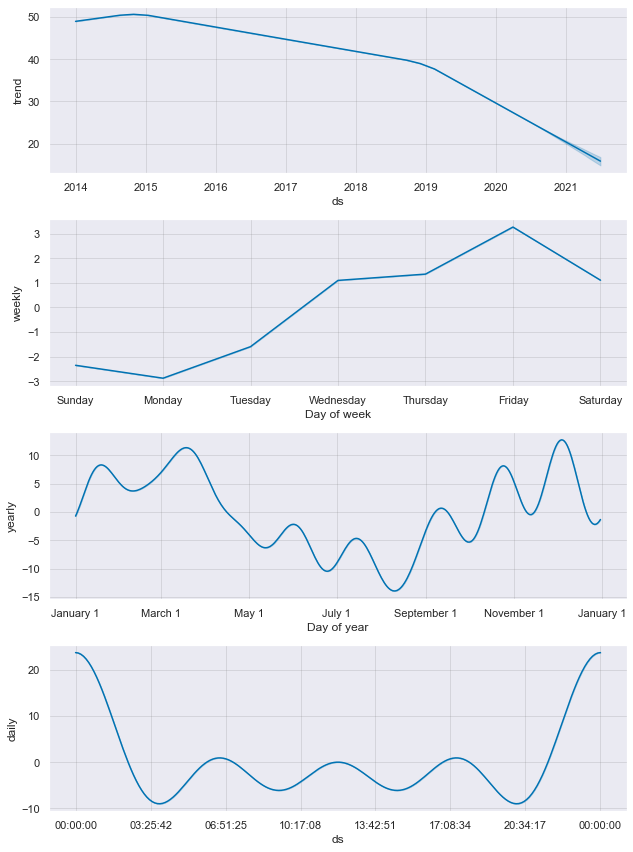

In [116]:
model_pm25_1.plot_components(forecast1)
plt.show()

Comparison of model values with real data 

In [117]:
# This test was done when dialy seasonality was not included in the model 

# rmse_pm25_prophet = rmse(test.y,forecast.yhat)
# rmse_pm25_prophet 

In [118]:
rmse_pm25_prophet_ds = rmse(test.y,forecast_pm25_1.yhat)
rmse_pm25_prophet_ds 

20.483860028559764

#### Training model on the whole historical data to make a prediction for the future

In [119]:
model_pm25_whole = Prophet(daily_seasonality=False)
# fit the model
model_pm25_whole.fit(pm25)

In [120]:
future_pm25_2022 = model_pm25_whole.make_future_dataframe(periods=365, freq='D')
forecast_pm25_2022 = model_pm25_whole.predict(future_pm25_2022)
forecast_pm25_2022.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
3282,2022-12-27,48.345034,22.502404,72.479594,47.732357,49.007908,-0.626723,-0.626723,-0.626723,-1.049233,-1.049233,-1.049233,0.422510,0.422510,0.422510,0.0,0.0,0.0,47.718311
3283,2022-12-28,48.339003,26.802035,73.753179,47.723803,49.004310,2.144881,2.144881,2.144881,1.485682,1.485682,1.485682,0.659200,0.659200,0.659200,0.0,0.0,0.0,50.483884
3284,2022-12-29,48.332972,25.339427,74.832251,47.715165,49.000712,2.201875,2.201875,2.201875,1.237323,1.237323,1.237323,0.964553,0.964553,0.964553,0.0,0.0,0.0,50.534848
3285,2022-12-30,48.326942,27.918348,77.128065,47.706388,48.997114,3.978189,3.978189,3.978189,2.648342,2.648342,2.648342,1.329847,1.329847,1.329847,0.0,0.0,0.0,52.305131
3286,2022-12-31,48.320911,26.675790,76.141833,47.697657,48.993885,2.586113,2.586113,2.586113,0.840773,0.840773,0.840773,1.745340,1.745340,1.745340,0.0,0.0,0.0,50.907024


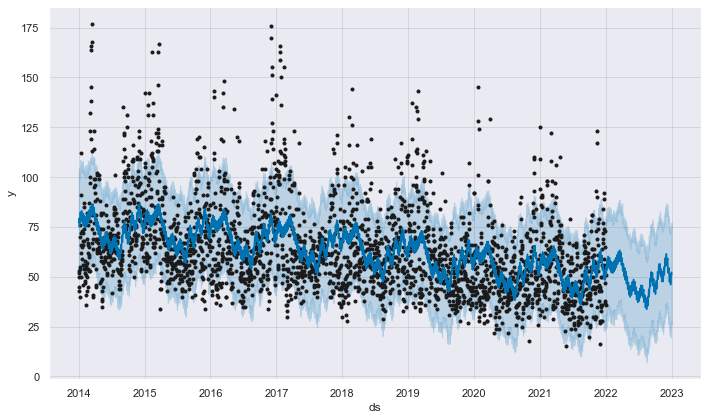

In [121]:
model_pm25_whole.plot(forecast_pm25_2022)
plt.show()

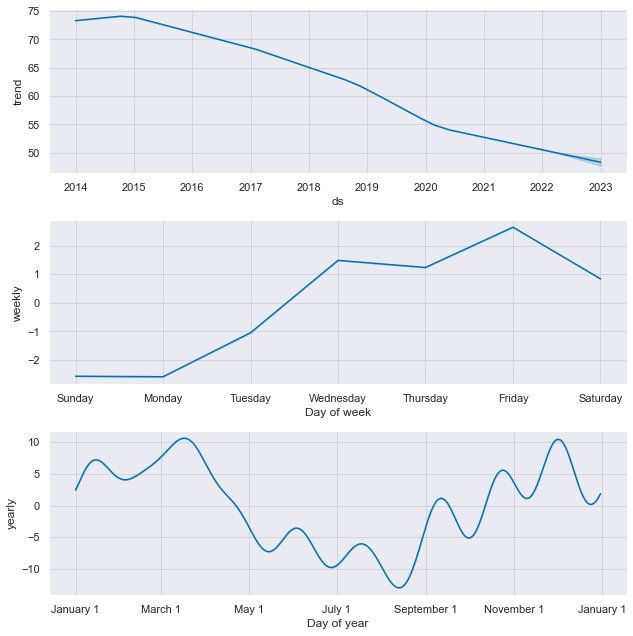

In [122]:
model_pm25_whole.plot_components(forecast_pm25_2022)
plt.show()

#### Time series analysis of PM10

In [123]:
data_pm10=paris.pm10.tolist()
date_time = paris.datetime.tolist()
pm10= pd.DataFrame({'ds':date_time, 'y':data_pm10})
pm10.dtypes

ds    datetime64[ns]
y            float64
dtype: object

Stationarity

In [124]:
result = adfuller(pm10.y)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -5.95
5% Critical Value: -2.86
p-value: 0.00


In [125]:
output_df = pd.DataFrame({"Values":[result[0],result[1],result[2],result[3], result[4]['1%'], result[4]['5%'], result[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

         Values                       Metric
0 -5.945335e+00              Test Statistics
1  2.211109e-07                      p-value
2  2.500000e+01             No. of lags used
3  2.896000e+03  Number of observations used
4 -3.432610e+00          critical value (1%)
5 -2.862539e+00          critical value (5%)
6 -2.567302e+00         critical value (10%)


In [126]:
'''As in case of PM2.5, the PM10 data is stationary'''

'As in case of PM2.5, the PM10 data is stationary'

Auto and partial correlation

C:\Users\radek\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


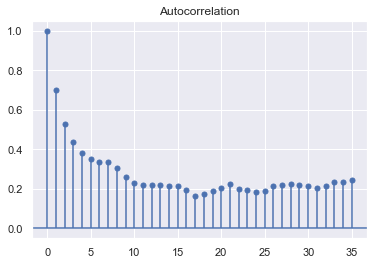

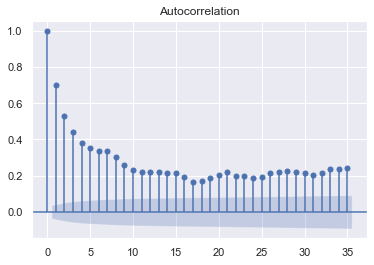

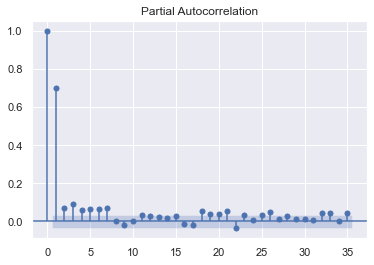

In [127]:
pmdarima.plot_acf(pm10.y)
plot_acf(pm10.y)
plt.show()
plot_pacf(pm10.y)
plt.show()

TREN LINE - Decomposition 

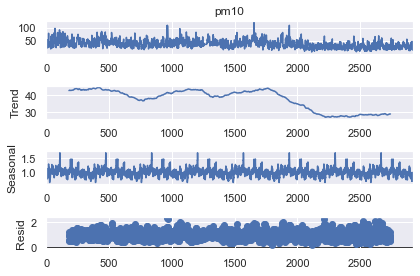

In [128]:
decompose = seasonal_decompose(paris.pm10,model='multiplicative', period=365)
decompose.plot()
plt.show()

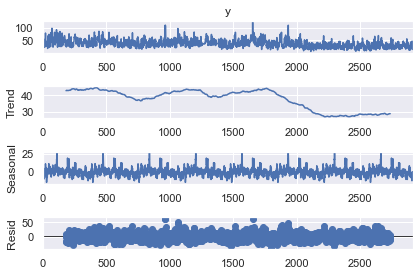

In [129]:
decompose_pm_add = seasonal_decompose(pm10.y,model='additive', period=365)
decompose_pm_add.plot()
plt.show()

Train/test split

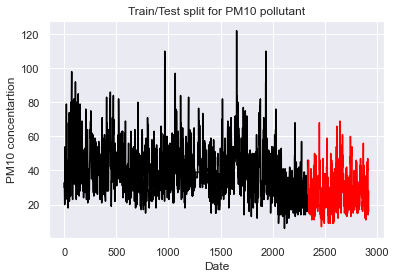

In [130]:
train = pm10[:2338]
test = pm10[2338:]
plt.plot(train.y, color = "black")
plt.plot(test.y, color = "red")
plt.title("Train/Test split for PM10 pollutant")
plt.ylabel("PM10 concentartion")
plt.xlabel('Date')
sns.set()
plt.show()

Prophet analysis 

In [131]:
# define the model
model_pm10_1 = Prophet(daily_seasonality=False)
# fit the model
model_pm10_1.fit(train)

          ds       yhat  yhat_lower  yhat_upper
0 2020-05-27  26.821138    9.593147   43.221104
1 2020-05-28  28.047646    9.893654   44.174020
2 2020-05-29  25.034940    8.851315   40.871467
3 2020-05-30  22.257881    5.271028   38.484567
4 2020-05-31  24.422433    8.832782   40.499609


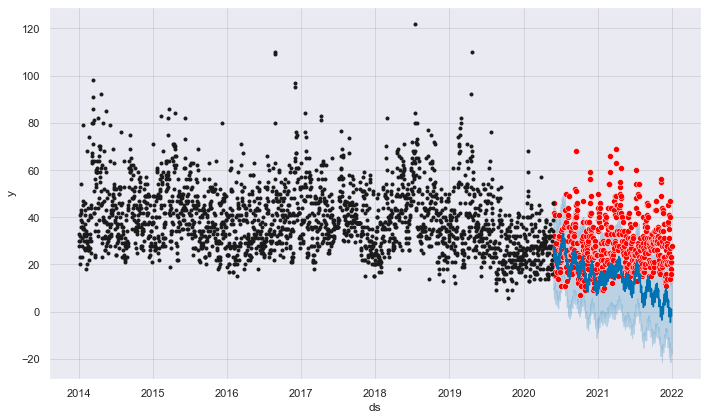

In [132]:
forecast_pm10_1 = model_pm10_1.predict(test)
# summarize the forecast
print(forecast_pm10_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model_pm10_1.plot(forecast_pm10_1)
sns.scatterplot(x='ds', y='y',data=test, color = "red")
plt.show()

Error

In [133]:
rmse_pm25_prophet_ds = rmse(test.y,forecast_pm10_1.yhat)
rmse_pm25_prophet_ds 

18.221145815921858

Training model on the whole dataset

In [134]:
model_pm10_whole = Prophet(daily_seasonality=True)
# fit the model
model_pm10_whole.fit(pm10)

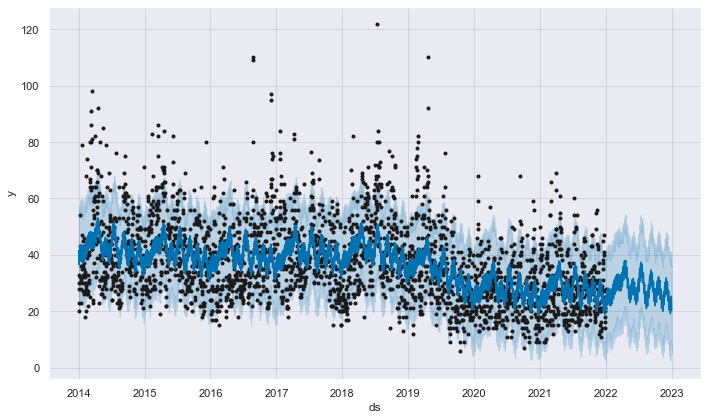

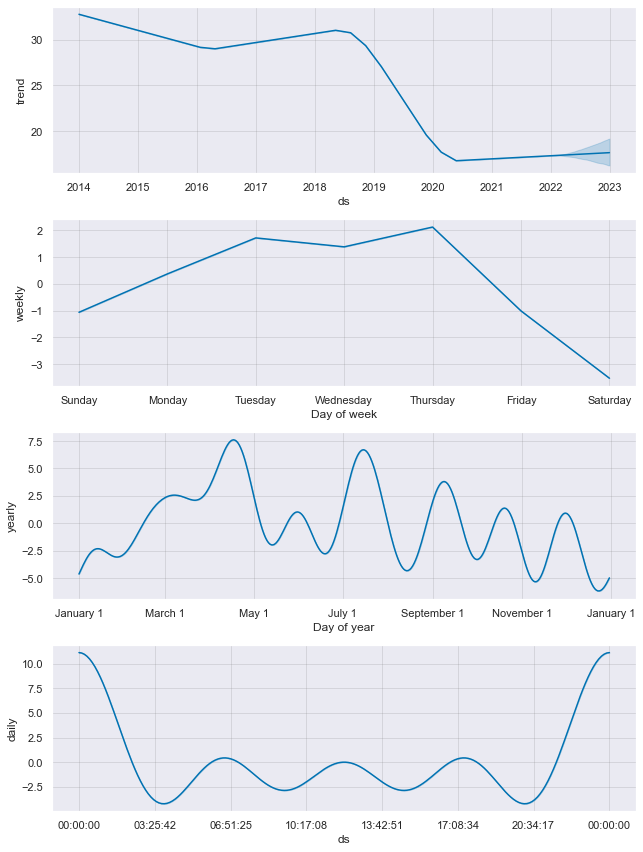

In [135]:
future_pm10_2022 = model_pm10_whole.make_future_dataframe(periods=365, freq='D')
forecast_pm10_2022 = model_pm10_whole.predict(future_pm10_2022)
forecast_pm10_2022.tail()

model_pm10_whole.plot(forecast_pm10_2022)
plt.show()

model_pm10_whole.plot_components(forecast_pm10_2022)
plt.show()

## O3

In [136]:
data_o3=paris.o3.tolist()
date_time = paris.datetime.tolist()
o3= pd.DataFrame({'ds':date_time, 'y':data_o3})
o3.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [137]:
o3.head()

,ds,y
0,2014-01-01,22.0
1,2014-01-02,22.0
2,2014-01-03,23.0
3,2014-01-04,19.0
4,2014-01-05,20.0


Stationarity

In [138]:
result = adfuller(o3.y)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -4.42
5% Critical Value: -2.86
p-value: 0.00


In [139]:
output_df = pd.DataFrame({"Values":[result[0],result[1],result[2],result[3], result[4]['1%'], result[4]['5%'], result[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

        Values                       Metric
0    -4.415687              Test Statistics
1     0.000278                      p-value
2    19.000000             No. of lags used
3  2902.000000  Number of observations used
4    -3.432605          critical value (1%)
5    -2.862536          critical value (5%)
6    -2.567300         critical value (10%)


In [140]:
#Data is stationary

Autocorrelation and Partial correlation

C:\Users\radek\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


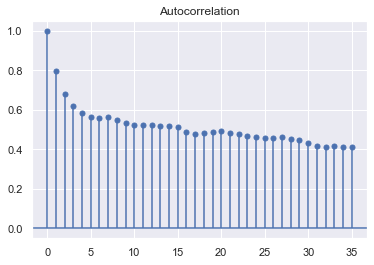

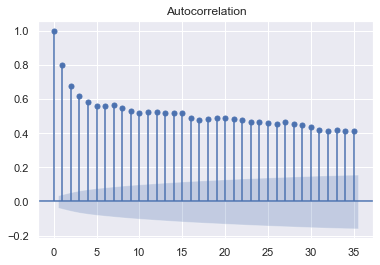

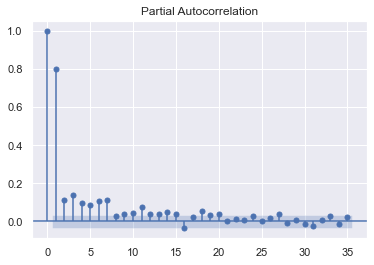

In [141]:
pmdarima.plot_acf(o3.y)
plot_acf(o3.y)
plt.show()
plot_pacf(o3.y)
plt.show()

TREND LINE

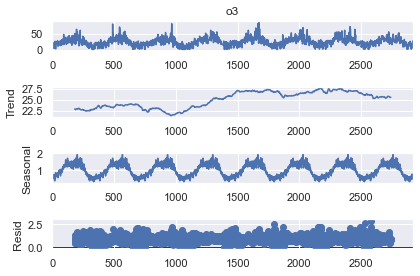

In [142]:
decompose = seasonal_decompose(paris.o3,model='multiplicative', period=365)
decompose.plot()
plt.show()

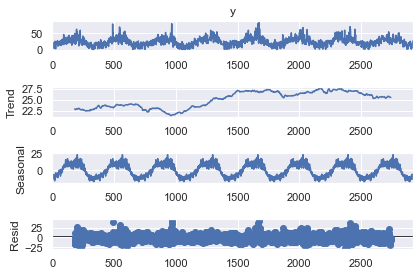

In [143]:
decompose_pm_add = seasonal_decompose(o3.y,model='additive', period=365)
decompose_pm_add.plot()
plt.show()

Train test split

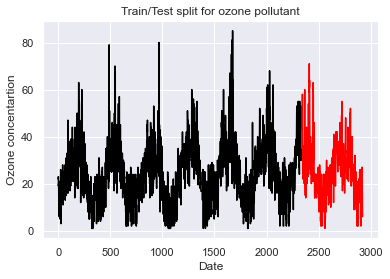

In [144]:
train = o3[:2338]
test = o3[2338:]
plt.plot(train.y, color = "black")
plt.plot(test.y, color = "red")
plt.title("Train/Test split for ozone pollutant")
plt.ylabel("Ozone concentartion")
plt.xlabel('Date')
sns.set()
plt.show()

Prophet analysis

In [145]:
# define the model
model_o3_1 = Prophet(daily_seasonality=True)
# fit the model
model_o3_1.fit(train)

          ds       yhat  yhat_lower  yhat_upper
0 2020-05-27  35.498718   25.451166   45.832829
1 2020-05-28  35.653469   25.697692   46.150910
2 2020-05-29  36.274265   26.116988   46.575880
3 2020-05-30  36.741556   26.435395   46.838523
4 2020-05-31  34.592036   24.465878   43.910552


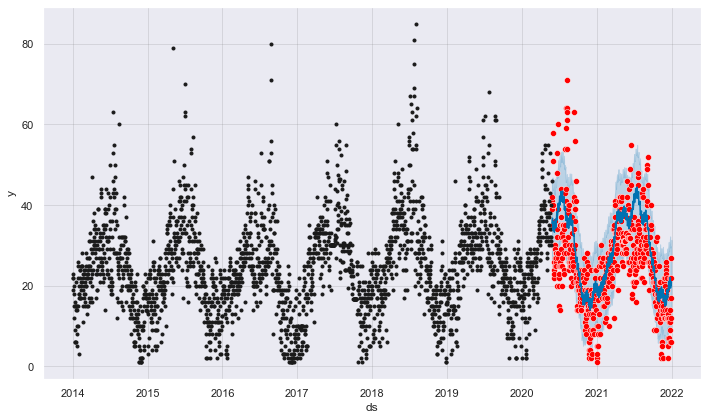

In [146]:
forecast_o3_1 = model_o3_1.predict(test)
# summarize the forecast
print(forecast_o3_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model_o3_1.plot(forecast_o3_1)
sns.scatterplot(x='ds', y='y',data=test, color = "red")
plt.show()

Error

In [147]:
rmse_o3_prophet_ds = rmse(test.y,forecast_o3_1.yhat)
rmse_o3_prophet_ds 

9.177180934738384

Training on the whole dataset

In [148]:
model_o3_whole = Prophet(daily_seasonality=False)
# fit the model
model_o3_whole.fit(o3)

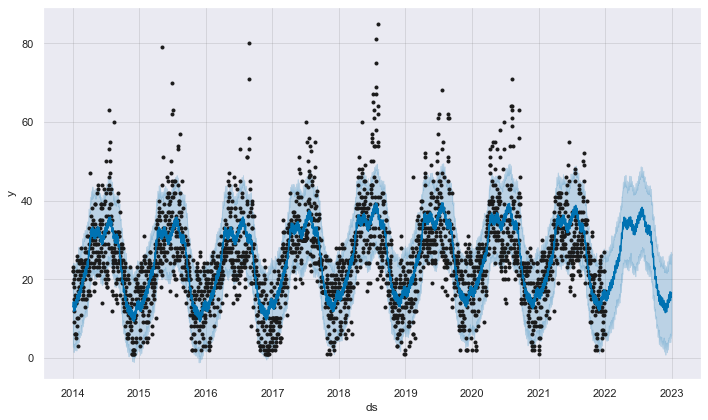

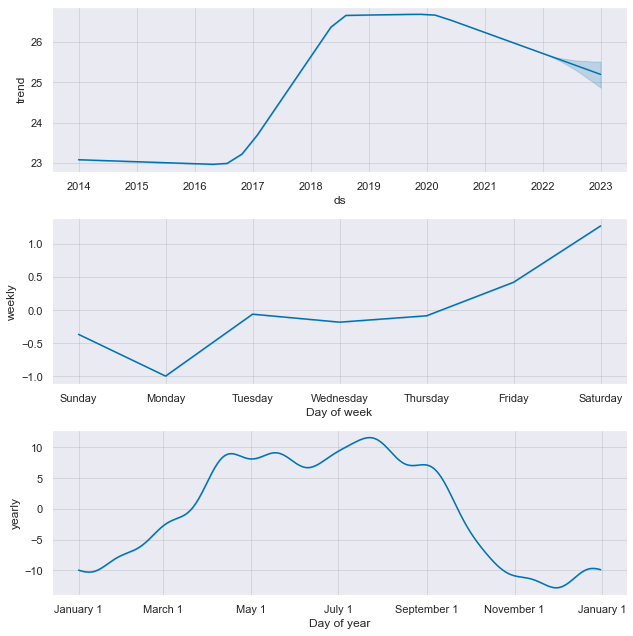

In [149]:
future_o3_2022 = model_o3_whole.make_future_dataframe(periods=365, freq='D')
forecast_o3_2022 = model_o3_whole.predict(future_o3_2022)
forecast_o3_2022.tail()

model_o3_whole.plot(forecast_o3_2022)
plt.show()

model_o3_whole.plot_components(forecast_o3_2022)
plt.show()

## NO2

In [150]:
data_no2=paris.no2.tolist()
date_time = paris.datetime.tolist()
no2= pd.DataFrame({'ds':date_time, 'y':data_no2})
no2.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [151]:
no2.head()

,ds,y
0,2014-01-01,42.0
1,2014-01-02,34.0
2,2014-01-03,41.0
3,2014-01-04,34.0
4,2014-01-05,30.0


Stationarity

In [152]:
result = adfuller(no2.y)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

ADF Test Statistic: -3.08
5% Critical Value: -2.86
p-value: 0.03


In [153]:
output_df = pd.DataFrame({"Values":[result[0],result[1],result[2],result[3], result[4]['1%'], result[4]['5%'], result[4]['10%']]  , "Metric":["Test Statistics","p-value","No. of lags used","Number of observations used", 
                                                        "critical value (1%)", "critical value (5%)", "critical value (10%)"]})
print(output_df)

        Values                       Metric
0    -3.084311              Test Statistics
1     0.027736                      p-value
2    27.000000             No. of lags used
3  2894.000000  Number of observations used
4    -3.432612          critical value (1%)
5    -2.862539          critical value (5%)
6    -2.567302         critical value (10%)


In [154]:
#data is stationary 

Autocorrelation and Partial Correlation

C:\Users\radek\anaconda3\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  res = tsaplots.plot_acf(


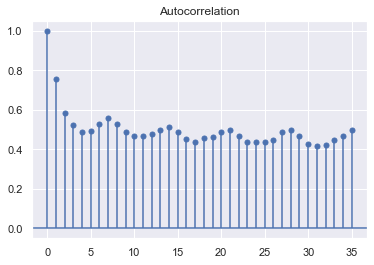

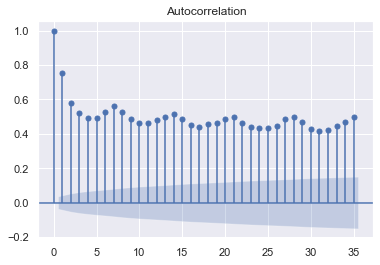

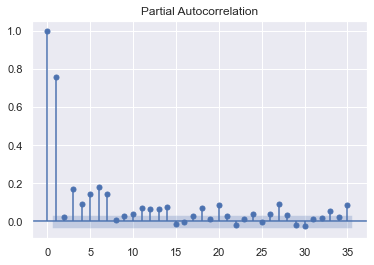

In [155]:
pmdarima.plot_acf(no2.y)
plot_acf(no2.y)
plt.show()
plot_pacf(no2.y)
plt.show()

TREND LINE

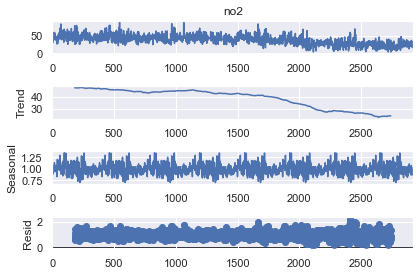

In [156]:
decompose = seasonal_decompose(paris.no2,model='multiplicative', period=365)
decompose.plot()
plt.show()

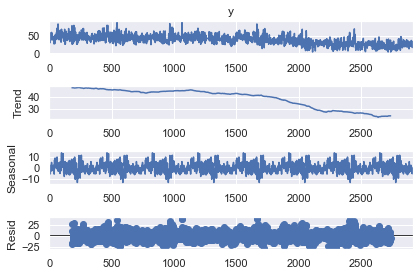

In [157]:
decompose_pm_add = seasonal_decompose(no2.y,model='additive', period=365)
decompose_pm_add.plot()
plt.show()

Train/test split

In [158]:
train = no2[:2338]
test = no2[2338:]
plt.plot(train.y, color = "black")
plt.plot(test.y, color = "red")
plt.title("Train/Test split for NO2 pollutant")
plt.ylabel('NO2 concentartion')
plt.xlabel('Date')
sns.set()
plt.show()

SyntaxError: EOL while scanning string literal (Temp/ipykernel_16556/1511533001.py, line 6)

Prophet Analysis

In [ ]:
# define the model
model_no2_1 = Prophet(daily_seasonality=False)
# fit the model
model_no2_1.fit(train)

          ds       yhat  yhat_lower  yhat_upper
0 2020-05-27  26.458398   15.157095   39.768861
1 2020-05-28  26.938040   14.370196   37.664767
2 2020-05-29  22.275516   10.797926   33.695303
3 2020-05-30  18.843662    7.185141   30.110081
4 2020-05-31  22.276150   10.999050   34.641392


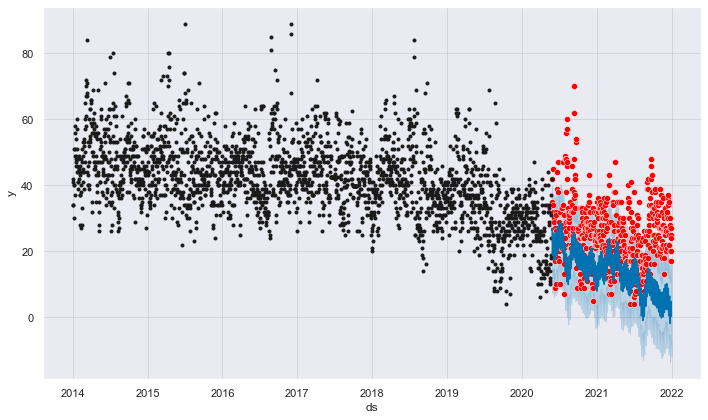

In [ ]:
forecast_no2_1 = model_no2_1.predict(test)
# summarize the forecast
print(forecast_no2_1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model_no2_1.plot(forecast_no2_1)
sns.scatterplot(x='ds', y='y',data=test, color = "red")
plt.show()

Error

In [ ]:
rmse_no2_prophet_ds = rmse(test.y,forecast_no2_1.yhat)
rmse_no2_prophet_ds 

14.764710130874546

Trainning on the whole data set

In [ ]:
model_no2_whole = Prophet(daily_seasonality=False)
# fit the model
model_no2_whole.fit(no2)

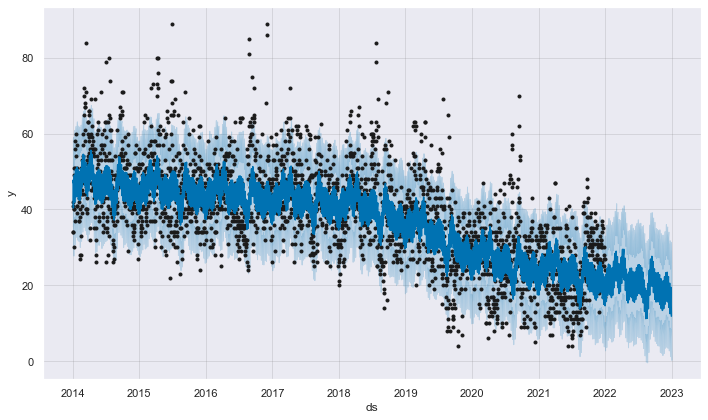

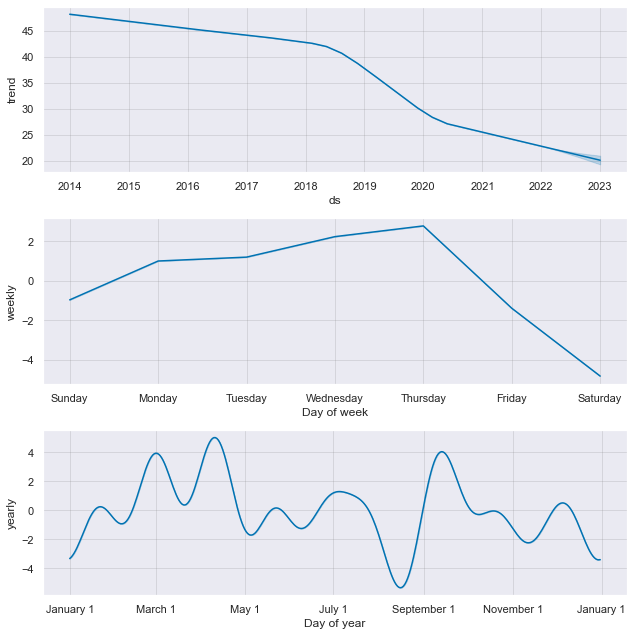

In [ ]:
future_no2_2022 = model_no2_whole.make_future_dataframe(periods=365, freq='D')
forecast_no2_2022 = model_no2_whole.predict(future_no2_2022)
forecast_no2_2022.tail()

model_no2_whole.plot(forecast_no2_2022)
plt.show()

model_no2_whole.plot_components(forecast_no2_2022)
plt.show()